
Machine learning is producing increase advantages in business values and efficiencies.  However, we need to be alert of bias in machine learning models that are producing inequalities to large portions of the population.  These bias models can target gender, race, age, income levels, …   The effect can include lost opportunities for employment, financial services, housing, fair judicial system, …

This bias and potential inequality can be an unnoticed process but have a powerful impact.  It is up to us to include in our development and maintenance process to look for bias in eradicate it.
Machine learning by default is bias, since it relies on statistical bias. This is required to make predictions, classifications, and correlations on new data the model has never seen before. However, focus needs to be put on the bias on the algorithms and training data used to create the models in the first place.

We will focus on  research conducted by ProPublica, a non-profit research institution, it was found that COMPAS, a machine learning algorithm used to determine criminal defendants’ likelihood to recommit crimes.  
We will:
1.	Get data 
2.	Initial - Exploratory data analysis (EDA)
3.	Initial – Data Wrangling
4.	Exploratory data analysis (EDA)
5.	Feature Engineering - Prepare the data for Machine Learning Algorithms
6.	Train, Evaluate, and Select a Model

Work in progress

7.	Using Variant Autoencoder (VAE - tensorflow) 
   Build  ML transformer of original  dataset , but removes sensitivity (race) while keeping almost    all data
   
8.	Using Variant Fair Autoencoder (VFAE - tensorflow) 
   Bias is removed


Data:
•	Compass dataset - The data set tracks Broward county Florida 
•	US census data for some initial data comparisons



# Machine Bias
# 
"""
https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

Context
COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges
and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism). It has been shown that the algorithm
is biased in favor of white defendants, and against black inmates, based on a 2 year follow up study (i.e who actually committed
crimes or violent crimes after 2 years). The pattern of mistakes, as measured by precision/sensitivity is notable.

Quoting from ProPublica: 

Black defendants were often predicted to be at a higher risk of recidivism than they actually were. Our analysis found that black defendants
who did not recidivate over a two-year period were nearly twice as likely to be misclassified as higher risk compared to their white counterparts
(45 percent vs. 23 percent). White defendants were often predicted to be less risky than they were. Our analysis found that white defendants who
re-offended within the next two years were mistakenly labeled low risk almost twice as often as black re-offenders (48 percent vs. 28 percent).
The analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were 45 percent more
likely to be assigned higher risk scores than white defendants.

Black defendants were also twice as likely as white defendants to be misclassified as being a higher risk of violent recidivism. And white violent
recidivists were 63 percent more likely to have been misclassified as a low risk of violent recidivism, compared with black violent recidivists.
The violent recidivism analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were
77 percent more likely to be assigned higher risk scores than white defendants. "

Content
Data contains variables used by the COMPAS algorithm in scoring defendants, along with their outcomes within 2 years of the decision, for over
10,000 criminal defendants in Broward County, Florida. 3 subsets of the data are provided, including a subset of only violent
recividism (as opposed to, e.g. being reincarcerated for non violent offenses such as vagrancy or Marijuana).

Indepth analysis by ProPublica can be found in their data methodology article.



Each pretrial defendant received at least three COMPAS scores:  (DisplayText)
“Risk of Recidivism,”
“Risk of Violence” 
“Risk of Failure to Appear.”

COMPAS scores for each defendant ranged from1 to 10, with ten being the highest risk. Scores (ScoreTex)
1 to 4 were labeled by COMPAS as “Low”;
5 to 7 were labeled “Medium”; and
8 to 10 were labeled “High.”


Columns
0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
25 - 27: 'AssessmentType', 'IsCompleted', 'IsDeleted'

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# Standardizing
from sklearn.preprocessing import StandardScaler
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#
from datetime import datetime
from datetime import date
#
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#
import collections


In [2]:
# load dataset
pthfnm = "./compas-scores-raw.csv"
df = pd.read_csv(pthfnm)

In [3]:
# initial EDA
print(df.shape)
print(df.info())

(60843, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
Person_ID                  60843 non-null int64
AssessmentID               60843 non-null int64
Case_ID                    60843 non-null int64
Agency_Text                60843 non-null object
LastName                   60843 non-null object
FirstName                  60843 non-null object
MiddleName                 15648 non-null object
Sex_Code_Text              60843 non-null object
Ethnic_Code_Text           60843 non-null object
DateOfBirth                60843 non-null object
ScaleSet_ID                60843 non-null int64
ScaleSet                   60843 non-null object
AssessmentReason           60843 non-null object
Language                   60843 non-null object
LegalStatus                60843 non-null object
CustodyStatus              60843 non-null object
MaritalStatus              60843 non-null object
Screening_Date             60843 non-null object
R

In [4]:
# Review data and Manipulate Data

# Ethnic_Code_Text
print(df.Ethnic_Code_Text.unique())

['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian' 'African-Am'
 'Native American' 'Oriental' 'Arabic']


In [5]:
# update 'Ethnic_Code_Text' to have conistent values for African Americans
df.loc[df['Ethnic_Code_Text'] == 'African-Am', 'Ethnic_Code_Text'] = 'African-American'
print(pd.value_counts(df['Ethnic_Code_Text']))

African-American    27069
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


In [6]:
# DecileScore should be between 1 & 10, delete otherwise
df.DecileScore.unique()
print((df['DecileScore'] < 1).sum())

45


In [7]:
# remove DecileScore < 1
df = df[df.DecileScore >= 1]
print(pd.value_counts(df['DecileScore']))

1     18465
2      9192
3      8492
4      5338
5      4831
6      4319
7      3338
8      2799
9      2386
10     1638
Name: DecileScore, dtype: int64


In [8]:
# slice and dice

# Slice by 'Ethnic_Code_Text' for blacks & whites
black = df.loc[df['Ethnic_Code_Text'] == 'African-American']
white = df.loc[df['Ethnic_Code_Text'] == 'Caucasian']
joint = df.loc[df['Ethnic_Code_Text'].isin (['Caucasian','African-American'])]
print('black :', black.shape, ' white: ', white.shape, ' joint: ', joint.shape)

black : (27053, 28)  white:  (21765, 28)  joint:  (48818, 28)


In [9]:
# Slice by 'Sex_Code_Text' for males & females
male = df.loc[df['Sex_Code_Text'] == 'Male']
female = df.loc[df['Sex_Code_Text'] == 'Female']
print('male :', male.shape, ' female: ', female.shape)

male : (47479, 28)  female:  (13319, 28)


In [10]:
# Slice by 'DisplayText' for Risk
RiskAppear = df.loc[df['DisplayText'] == 'Risk of Failure to Appear']
RiskViolence = df.loc[df['DisplayText'] == 'Risk of Violence']
RiskRecidivism = df.loc[df['DisplayText'] == 'Risk of Recidivism']
print('Appear:', RiskAppear.shape, ' Violence: ', RiskViolence.shape,  ' Recidivism:',RiskRecidivism.shape)

Appear: (20281, 28)  Violence:  (20272, 28)  Recidivism: (20245, 28)


In [11]:
# Aggregate
grprace = df.groupby(['Ethnic_Code_Text']).count()
grpgender = df.groupby(['Sex_Code_Text']).count()
print('Race: ',grprace.shape, ' Gender:', grpgender.shape)

Race:  (8, 27)  Gender: (2, 27)


# EDA  - looking at potential bias



In [12]:
## Display distribution of group data
# % data distribution by Ethnic_Code_Text
round(grprace[['DecileScore']]/len(df),4)*100

,DecileScore
Ethnic_Code_Text,
African-American,44.50
Arabic,0.12
Asian,0.53
Caucasian,35.80
Hispanic,14.36
Native American,0.36
Oriental,0.06
Other,4.26


In [ ]:
# There are more African Americans (45%) in the dataset, eventhough in the county African American only make 
# up (30%) of the population

In [13]:
# % data distribution by Sex_Code_Text
round(grpgender[['DecileScore']]/len(df),4)*100


,DecileScore
Sex_Code_Text,
Female,21.91
Male,78.09


In [ ]:
# There are more males (78%) in the dataset, eventhough in the county males make 
# up (49%) of the population

In [14]:
# DecileScore Mean by race
race=df.Ethnic_Code_Text.unique()
print('Mean DecileScore by Race')
for i in race:
    mn = round(df.loc[df['Ethnic_Code_Text'] == i]['DecileScore'].mean(), 2)
    print(i,'- ',mn)

Mean DecileScore by Race
Caucasian -  3.11
African-American -  4.29
Hispanic -  2.86
Other -  2.51
Asian -  2.37
Native American -  4.05
Oriental -  2.74
Arabic -  3.13


In [ ]:
# Mean DecileScore is highest for African Americans

In [15]:
# DecileScore Mean by gender
gender=df.Sex_Code_Text.unique()
print('Mean DecileScore by Gender')
for i in gender:
    mn = round(df.loc[df['Sex_Code_Text'] == i]['DecileScore'].mean(), 2)
    print(i,'- ',mn)

Mean DecileScore by Gender
Male -  3.66
Female -  3.26


In [ ]:
# Mean DecileScore is highest for males

In [ ]:
# Visualize

In [16]:
# Define grp_plot_compare:
# creates groups and then plot them to compare them
def grp_plot_compare(df1, df2, xlabel1, colnm1, total_pop, multby, title,label1, label2):
    grp1 = df1.groupby([xlabel1]).count()
    grp2 = df2.groupby([xlabel1]).count()
    
#   to be used for weighted average  
    div1 = len(df1)
    div2 = len(df2)
    
    n_groups = len(grp1)
# create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(grp1.index,(round(grp1[colnm1]/div1,2)*multby), bar_width,
                 alpha=opacity,
                 color='b',
                 label=label1)

    rects2 = plt.bar(grp2.index+ bar_width, (round(grp2[colnm1]/div2,2)*multby), bar_width,
                 alpha=opacity,
                 color='g',
                 label=label2)

    plt.xlabel(xlabel1)
    if total_pop > 1:
        plt.ylabel('Percentage')
    else:
        plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.clf()

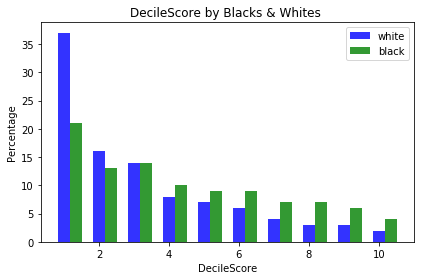

In [17]:
# Comparing White & Black defendants on the  'DecileScore'
grp_plot_compare(white, black, 'DecileScore','Ethnic_Code_Text', len(df), 100, \
                 'DecileScore by Blacks & Whites ', \
                 'white','black')

In [ ]:
# Whites have lower Decile Scores and Blacks have higher Decile Scores

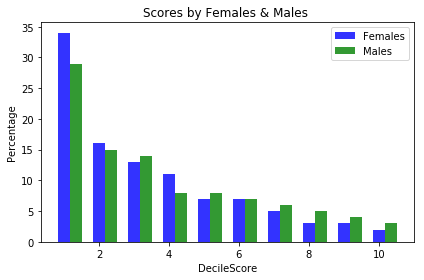

In [18]:
# Comparing Male & Female defendants on the  'DecileScore'
grp_plot_compare(female, male, 'DecileScore','Sex_Code_Text', len(df), 100, \
                 'Scores by Females & Males ', \
                 'Females','Males')


In [ ]:
# Females have lower Decile Scores and Males have higher Decile Scores

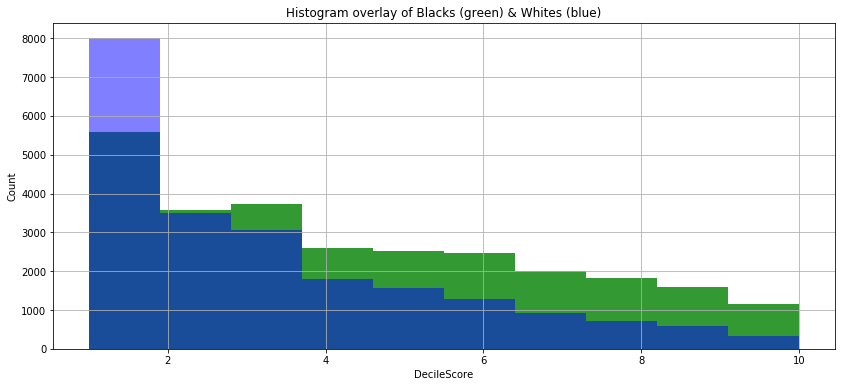

In [19]:
####################################################################################
# Histogram overlay
fig, ax = plt.subplots()
black['DecileScore'].hist(bins=10, figsize=[14,6],color='g',alpha=.8 )
white['DecileScore'].hist(bins=10, figsize=[14,6],color='b',alpha=.5 )
plt.title('Histogram overlay of Blacks (green) & Whites (blue)')
plt.legend()
plt.xlabel('DecileScore')
plt.ylabel('Count')
plt.show()
plt.clf()

# Feature Engineering

In [20]:
# Add column 'Age' from DateofBirth
agelist = []
currdate = date.today()
for dte in df['DateOfBirth']:
    brthdte = datetime.strptime(dte, '%m/%d/%y')
    mnthday = (currdate.month, currdate.day) < (brthdte.month, brthdte.day)
    if currdate.year > brthdte.year:
        agelist.append(currdate.year - brthdte.year - (mnthday))
    else:
        agelist.append(-1)
        

In [21]:
print(len(agelist), len(df))
df['Age'] = agelist
print(df.columns)

60798 60798
Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted', 'Age'],
      dtype='object')


In [22]:
# cleanup bad Ages
# remove DecileScore < 1
(df['Age'] < 1).sum()

12782

In [23]:
df = df[df.Age >= 1]
(df['Age'] < 1).sum()

0

In [24]:
df['Age'].describe()

count    48016.000000
mean        33.053878
std          7.185001
min         20.000000
25%         27.000000
50%         32.000000
75%         38.000000
max         49.000000
Name: Age, dtype: float64

In [25]:
# Slice by 'DisplayText' for Risk
RiskAppear = df.loc[df['DisplayText'] == 'Risk of Failure to Appear']
RiskViolence = df.loc[df['DisplayText'] == 'Risk of Violence']
RiskRecidivism = df.loc[df['DisplayText'] == 'Risk of Recidivism']
print('Appear:', RiskAppear.shape, ' Violence: ', RiskViolence.shape,  ' Recidivism:',RiskRecidivism.shape)

Appear: (16016, 29)  Violence:  (16010, 29)  Recidivism: (15990, 29)


In [ ]:
# More feature engineering using Label encoder and One-Hot encoder

# Running ML models

# Train, Evaluate, and Select a Model

In [26]:
# Define prepare_data_for_ml_model_1:
def prepare_data_for_ml_model_1(dfx, target_loc):
    # Create new Dataset of selected columns to get prepare TEST and Training data for  ML model 
     
    """
    Columns
    0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
    5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
    10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
    15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
    20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
    25 - 28: 'AssessmentType', 'IsCompleted', 'IsDeleted','Age'
    """

    x_df = dfx.iloc[:, [7,8,14,15,16,19]] #features
    tmp_age = dfx.iloc[:,28].as_matrix() #age feature, convert numpy array
    x_age = tmp_age.reshape(tmp_age.size,1)
    

    y = dfx.iloc[:,target_loc].as_matrix() #target convert numpy array


    #  lable encoder. It encodes the data into integers
    le = LabelEncoder()

    Sex_Code_Text_cat = le.fit_transform(x_df.Sex_Code_Text)
    Ethnic_Code_Text_cat = le.fit_transform(x_df.Ethnic_Code_Text)
    LegalStatus_cat = le.fit_transform(x_df.LegalStatus)
    CustodyStatus_cat = le.fit_transform(x_df.CustodyStatus)
    MaritalStatus_cat = le.fit_transform(x_df.MaritalStatus)
    RecSupervisionLevelText_cat = le.fit_transform(x_df.RecSupervisionLevelText)

    Sex_Code_Text_cat = Sex_Code_Text_cat.reshape(len(Sex_Code_Text_cat),1)
    Ethnic_Code_Text_cat = Ethnic_Code_Text_cat.reshape(len(Ethnic_Code_Text_cat),1)
    LegalStatus_cat = LegalStatus_cat.reshape(len(LegalStatus_cat),1)
    CustodyStatus_cat = CustodyStatus_cat.reshape(len(CustodyStatus_cat),1)
    MaritalStatus_cat = MaritalStatus_cat.reshape(len(MaritalStatus_cat),1)
    RecSupervisionLevelText_cat = RecSupervisionLevelText_cat.reshape(len(RecSupervisionLevelText_cat),1)

#  One-Hot encoder. It encodes the data into binary format
    onehote = OneHotEncoder(sparse=False)
    
    Sex_Code_Text_oh = onehote.fit_transform(Sex_Code_Text_cat)
    Ethnic_Code_Text_oh = onehote.fit_transform(Ethnic_Code_Text_cat)
    LegalStatus_oh = onehote.fit_transform(LegalStatus_cat)
    CustodyStatus_oh = onehote.fit_transform(CustodyStatus_cat)
    MaritalStatus_oh = onehote.fit_transform(MaritalStatus_cat)
    RecSupervisionLevelText_oh = onehote.fit_transform(RecSupervisionLevelText_cat)

# Build out feature dataset as numpy array, since One-Hot encoder creates numpy array
    X_feature =  Sex_Code_Text_oh
    X_feature = np.concatenate((X_feature,Ethnic_Code_Text_oh), axis=1)
    X_feature = np.concatenate((X_feature,LegalStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,CustodyStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,MaritalStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,RecSupervisionLevelText_oh), axis=1)
    X_feature = np.concatenate((X_feature,x_age), axis=1)

# Split data train and test
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2)
    print('Length for X_train:', len(X_train), ' X_test:',len(X_test), ' y_train:',len(y_train) ,' y_test:',len(y_test))

    return X_train, X_test, y_train, y_test

In [27]:
# Define ml_model_1:
# takes in model Instantiate model (model)
# fits, predicts, and evaluates (prints results)
def ml_model_1(model, modelnm, dfnm, X_train, X_test, y_train, y_test, target):
    print('Running ', modelnm, ' model for :', dfnm, ' using target: ', target)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluate
    print(modelnm,' score: ',model.score(X_test, y_test))
    print(' ')
    print('first 10 predicted values: ',y_pred[0:10])
    print('first 10 values of target: ')
    print(y_test[0:10])
    print(' ')

    print('mean of predicted of values: ',np.mean(y_pred), ' STD of predicted of values : ', np.std(y_pred) )
    print('describe of target')
    print('mean of predicted of values: ',np.mean(y_test), ' STD of predicted of values : ', np.std(y_test) )

    return y_pred

In [ ]:
# MLPRegressor

In [30]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

In [29]:
# MLPRegressor - RiskViolence dataset target RawScore (22)
# Preparing the data
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskViolence,22)

Length for X_train: 12808  X_test: 3202  y_train: 12808  y_test: 3202


In [30]:
# Predicting and getting score
ml_model_1(clf, 'MLPRegressor', 'RiskViolence', X_train, X_test, y_train, y_test, 'RawScore')

Running  MLPRegressor  model for : RiskViolence  using target:  RawScore
Iteration 1, loss = 2.98883576
Iteration 2, loss = 0.74201189
Iteration 3, loss = 0.26413695
Iteration 4, loss = 0.25026084
Iteration 5, loss = 0.23207398
Iteration 6, loss = 0.20220697
Iteration 7, loss = 0.17667825
Iteration 8, loss = 0.14790374
Iteration 9, loss = 0.12525257
Iteration 10, loss = 0.10971391
Iteration 11, loss = 0.09800340
Iteration 12, loss = 0.08924755
Iteration 13, loss = 0.08286828
Iteration 14, loss = 0.07823534
Iteration 15, loss = 0.07473552
Iteration 16, loss = 0.07215164
Iteration 17, loss = 0.07015977
Iteration 18, loss = 0.06864968
Iteration 19, loss = 0.06750685
Iteration 20, loss = 0.06671386
Iteration 21, loss = 0.06584817
Iteration 22, loss = 0.06531424
Iteration 23, loss = 0.06482931
Iteration 24, loss = 0.06445568
Iteration 25, loss = 0.06399009
Iteration 26, loss = 0.06405254
Iteration 27, loss = 0.06332068
Iteration 28, loss = 0.06322177
Iteration 29, loss = 0.06283040
Iteratio

array([-1.82186604, -2.69447506, -1.92605979, ..., -2.33783544,
       -1.58087195, -2.14794373])

In [ ]:
# Running  MLPRegressor  model for : RiskViolence  using target:  RawScore
#  score:  0.8007348392629005

In [31]:
# MLPRegressor - RiskRecidivism dataset target RawScore (22)
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskRecidivism,22)

Length for X_train: 12792  X_test: 3198  y_train: 12792  y_test: 3198


In [32]:
# Predicting and getting score
ml_model_1(clf, 'MLPRegressor', 'RiskRecidivism', X_train, X_test, y_train, y_test, 'RawScore')

Running  MLPRegressor  model for : RiskRecidivism  using target:  RawScore
Iteration 1, loss = 0.37060787
Iteration 2, loss = 0.25702373
Iteration 3, loss = 0.22164057
Iteration 4, loss = 0.18740374
Iteration 5, loss = 0.16034402
Iteration 6, loss = 0.13804442
Iteration 7, loss = 0.12086234
Iteration 8, loss = 0.10723131
Iteration 9, loss = 0.09434393
Iteration 10, loss = 0.08517670
Iteration 11, loss = 0.07888327
Iteration 12, loss = 0.07456704
Iteration 13, loss = 0.07140171
Iteration 14, loss = 0.06933528
Iteration 15, loss = 0.06774772
Iteration 16, loss = 0.06678251
Iteration 17, loss = 0.06611576
Iteration 18, loss = 0.06590498
Iteration 19, loss = 0.06524134
Iteration 20, loss = 0.06495674
Iteration 21, loss = 0.06468203
Iteration 22, loss = 0.06444429
Iteration 23, loss = 0.06427861
Iteration 24, loss = 0.06420078
Iteration 25, loss = 0.06395157
Iteration 26, loss = 0.06341392
Iteration 27, loss = 0.06314134
Iteration 28, loss = 0.06289898
Iteration 29, loss = 0.06260979
Iterat

array([ 0.37348362, -0.20332117, -0.21962016, ...,  0.30540186,
       -1.12363142, -0.21405308])

# Model Best Score 
Running MLPRegressor model for : RiskRecidivism using target: DecileScore score:  0.8414744125013081

In [ ]:
# Preparing for VAE using tensorflow

In [33]:
class dataReader(object):
    # Code provided by Andrei Fajardo
    # to substitude for ...train.next_batch

    def __init__(self,*arrays,batch_size=1):
        self.arrays = arrays
        self.__check_equal_shape()
        self.num_examples = self.arrays[0].shape[0]
        self.batch_number = 0
        self.batch_size = batch_size
        self.num_batches = int(np.ceil(self.num_examples / batch_size))

    def __check_equal_shape(self):
        if any(self.arrays[0].shape[0] != arr.shape[0] for arr in self.arrays[1:]):
            raise ValueError("all arrays must be equal along first dimension")

    def next_batch(self):
        low_ix = self.batch_number*self.batch_size
        up_ix = (self.batch_number + 1)*self.batch_size
        if up_ix >= self.num_examples:
            up_ix = self.num_examples
            self.batch_number = 0 # reset batch_number to zero
        else:
            self.batch_number = self.batch_number + 1

        return [arr[low_ix:up_ix,:] for arr in self.arrays]


In [34]:
#  Tensorflow  Implementation 

import tensorflow as tf
import os
import sys
from functools import partial
from sklearn.preprocessing import StandardScaler

In [35]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [36]:
# RiskRecidivism dataset target RawScore (22)
# X_train.shape (12792, 35)
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskRecidivism,22)

Length for X_train: 12792  X_test: 3198  y_train: 12792  y_test: 3198


In [37]:
print(X_train.shape)

(12792, 35)


In [38]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
# X = tf.constant(X_scaler, dtype=tf.float32, name="X")
X = tf.placeholder(tf.float32, shape=[None, 35], name="X")


n_inputs = 35 # 28 * 28
n_hidden1 = 300
n_hidden2 = 150  
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

C:\Users\rivas\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [39]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [40]:
print(data_reader.num_batches)

86


In [41]:
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        #n_batches = mnist.train.num_examples // batch_size
        n_batches = data_reader.num_batches
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()                                          
            X_batch, y_batch = data_reader.next_batch()
            sess.run(training_op, feed_dict={X: X_batch})

        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   
        print("\r{}".format(epoch), "Train MSE:", loss_train)           
        saver.save(sess, "./my_model_all_layers.ckpt")


08% Train MSE: 0.037109908
1 Train MSE: 0.029453315
2 Train MSE: 0.02437022
3 Train MSE: 0.020707564
4 Train MSE: 0.039617613
5 Train MSE: 0.02288242
6 Train MSE: 0.0487869
7 Train MSE: 11.099429
8 Train MSE: 0.63306123
9 Train MSE: 0.6131373
10 Train MSE: 0.535426
11 Train MSE: 0.6038917
12% Train MSE: 0.5072129
13 Train MSE: 0.53795636
14% Train MSE: 0.5828473
15 Train MSE: 0.5022591
16 Train MSE: 0.505577
17 Train MSE: 0.4823163
18% Train MSE: 0.49494296
19% Train MSE: 0.46706817
20% Train MSE: 0.46004823
21% Train MSE: 0.45608553
22 Train MSE: 0.45119458
23 Train MSE: 0.44707164
24% Train MSE: 0.44393575
25% Train MSE: 0.44070184
26 Train MSE: 0.4377091
27 Train MSE: 0.47975755
28 Train MSE: 0.4343702
29 Train MSE: 0.4302937
30% Train MSE: 0.4288808
31 Train MSE: 0.42655864
32 Train MSE: 0.42463183
33 Train MSE: 0.4221184
34 Train MSE: 0.4204234
35 Train MSE: 0.42798182
36 Train MSE: 0.41317388
37 Train MSE: 0.41104007
38 Train MSE: 0.4055257
39 Train MSE: 0.40446523
40 Train MSE: 

In [ ]:
# Variational Autoencoder (VAE)

In [42]:
reset_graph()

from functools import partial


n_inputs = 35
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20  # codings
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

#
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
X = tf.placeholder(tf.float32, shape=[None, 35], name="X")
#X = tf.placeholder(tf.float32, [None, n_inputs])

#
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma = my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
logits = my_dense_layer(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy)

In [43]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [44]:
eps = 1e-10 # smoothing term to avoid computing log(0) which is NaN
latent_loss = 0.5 * tf.reduce_sum(
    tf.square(hidden3_sigma) + tf.square(hidden3_mean)
    - 1 - tf.log(eps + tf.square(hidden3_sigma)))

In [45]:
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        #n_batches = mnist.train.num_examples // batch_size
        n_batches = data_reader.num_batches
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = data_reader.next_batch()
            #X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss], feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train total loss:", loss_val, "\tReconstruction loss:", reconstruction_loss_val, "\tLatent loss:", latent_loss_val)
        saver.save(sess, "./my_model_variational.ckpt")

0 Train total loss: -63952668.0 	Reconstruction loss: -112909144.0 	Latent loss: 48956476.0
1 Train total loss: -21706420000.0 	Reconstruction loss: -41060983000.0 	Latent loss: 19354563000.0
2 Train total loss: -560661270000.0 	Reconstruction loss: -1079831300000.0 	Latent loss: 519170000000.0
3 Train total loss: -4917343300000.0 	Reconstruction loss: -9500744000000.0 	Latent loss: 4583401000000.0
4 Train total loss: -24390759000000.0 	Reconstruction loss: -47347078000000.0 	Latent loss: 22956320000000.0
5 Train total loss: -86488755000000.0 	Reconstruction loss: -167869450000000.0 	Latent loss: 81380700000000.0
6 Train total loss: -241411420000000.0 	Reconstruction loss: -471110700000000.0 	Latent loss: 229699280000000.0
7 Train total loss: -576044400000000.0 	Reconstruction loss: -1125555240000000.0 	Latent loss: 549510870000000.0
8 Train total loss: -1215638400000000.0 	Reconstruction loss: -2379194000000000.0 	Latent loss: 1163555500000000.0
9 Train total loss: -2333881500000000.0

In [ ]:
# VFAE

In [47]:
from tensorflow.contrib.layers import fully_connected, batch_norm
from datetime import datetime

###  Functions

In [48]:
def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

### Construction Phase

We will construct the graph for the VFAE architecture:

    Input: X = [X_without_s, s], where s is the sensitive feature

    Middle Encodings: We're learning the parameters for the distribution of the encodings. What's different here is that we inject both the response y and the sensitive features in the middle layers.

    Output: X_copy

In [49]:
# Construction phase
# n_s = 10 # number of sensitive features
# n_inputs = 28*28 - n_s # number of non-sensitive features
n_s = 1 # number of sensitive features
n_inputs = 35 - n_s # number of non-sensitive features

# encoders
n_hidden1 = 500
n_hidden2 = 20 # codings
n_hidden3 = 500
n_hidden4 = 20

# decoders
n_hidden5 = 500
n_hidden6 = 20
n_hidden7 = 500

# final output can take a random sample from the posterior
n_outputs = n_inputs + n_s

In [50]:
### Training rates
alpha = 1
learning_rate = 0.001

In [51]:
### Setting up the graph
with tf.contrib.framework.arg_scope(
        [fully_connected],
        activation_fn = tf.nn.elu,
        weights_initializer = tf.contrib.layers.variance_scaling_initializer()):
    X = tf.placeholder(tf.float32, shape = [None, n_inputs], name="X_wo_s")
    s = tf.placeholder(tf.float32, shape = [None, n_s], name="s")
    X_full = tf.concat([X,s], axis=1)
    y = tf.placeholder(tf.int32, shape = [None, 1], name="y") # for your example, switch this to tf.float32 bc you'll be doing reg
    is_unlabelled = tf.placeholder(tf.bool, shape=(), name='is_training') # don't worry about this
    with tf.name_scope("X_encoder"):
        hidden1 = fully_connected(tf.concat([X, s], axis=1), n_hidden1)
        hidden2_mean = fully_connected(hidden1, n_hidden2, activation_fn = None)
        hidden2_gamma = fully_connected(hidden1, n_hidden2, activation_fn = None)
        hidden2_sigma = tf.exp(0.5 * hidden2_gamma)
    noise1 = tf.random_normal(tf.shape(hidden2_sigma), dtype=tf.float32)
    hidden2 = hidden2_mean + hidden2_sigma * noise1         # z1
    with tf.name_scope("Z1_encoder"):
        hidden3_ygz1 = fully_connected(hidden2, n_hidden4, activation_fn = tf.nn.tanh)
        hidden4_softmax_mean = fully_connected(hidden3_ygz1, 10, activation_fn = tf.nn.softmax)
        if is_unlabelled == True:
            # impute by sampling from q(y|z1)
            y = tf.assign(y, tf.multinomial(hidden4_softmax_mean, 1,
                                output_type = tf.int32))
        hidden3 = fully_connected(tf.concat([hidden2, tf.cast(y, tf.float32)], axis=1),
                        n_hidden3, activation_fn=tf.nn.tanh)
        hidden4_mean = fully_connected(hidden3, n_hidden4, activation_fn = None)
        hidden4_gamma = fully_connected(hidden3, n_hidden4, activation_fn = None)
        hidden4_sigma = tf.exp(0.5 * hidden4_gamma)
    noise2 = tf.random_normal(tf.shape(hidden4_sigma), dtype=tf.float32)
    hidden4 = hidden4_mean + hidden4_sigma * noise2     # z2
    with tf.name_scope("Z1_decoder"):
        hidden5 = fully_connected(tf.concat([hidden4, tf.cast(y, tf.float32)], axis=1 ),
                    n_hidden5, activation_fn = tf.nn.tanh)
        hidden6_mean = fully_connected(hidden5, n_hidden6, activation_fn = None)
        hidden6_gamma = fully_connected(hidden5, n_hidden6, activation_fn = None)
        hidden6_sigma = tf.exp(0.5 * hidden6_gamma)
    noise3 = tf.random_normal(tf.shape(hidden6_sigma), dtype=tf.float32)
    hidden6 = hidden6_mean + hidden6_sigma * noise3     # z1 (decoded)
    with tf.name_scope("X_decoder"):
        hidden7 = fully_connected(tf.concat([hidden6, s], axis=1), n_hidden7,
                                 activation_fn = tf.nn.tanh)
        hidden8 = fully_connected(hidden7, n_outputs, activation_fn = None)
    outputs = tf.sigmoid(hidden8, name="decoded_X")

### Loss Function: ELBO

In [52]:
# expected lower bound
with tf.name_scope("ELB"):
    kl_z2 = 0.5 * tf.reduce_sum(
                    tf.exp(hidden4_gamma)
                    + tf.square(hidden4_mean)
                    - 1
                    - hidden4_gamma
                    )

    kl_z1 = 0.5 * (tf.reduce_sum(
                    (1 / (1e-10 + tf.exp(hidden6_gamma))) * tf.exp(hidden2_gamma)
                    - 1
                    + hidden6_gamma
                    - hidden2_gamma
                    ) + tf.einsum('ij,ji -> i', # this might not work for you depending on version of tflow
                        (hidden6_mean-hidden2_mean) * (1 / (1e-10 + tf.exp(hidden6_gamma))),
                        tf.transpose((hidden6_mean-hidden2_mean))))

    indices = tf.range(tf.shape(y)[0])
    indices = tf.concat([indices[:, tf.newaxis], y], axis=1)
    eps = 1e-10
    log_q_y_z1 = tf.reduce_sum(tf.log(eps + tf.gather_nd(hidden4_softmax_mean, indices)))

    # Bernoulli log-likelihood
    reconstruction_loss = -(tf.reduce_sum(X_full * tf.log(outputs)
                            + (1 - X_full) * tf.log(1 - outputs)))
    cost = kl_z2 + kl_z1 + reconstruction_loss + alpha * log_q_y_z1

In [53]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

### Initialize Graph & Load Data

In [54]:
init = tf.global_variables_initializer()

In [55]:
# Training
n_epochs = 50
batch_size = 100
n_digits = 60

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        # n_batches = mnist.train.num_examples // batch_size
        n_batches = data_reader.num_batches
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            X_batch, y_batch = data_reader.next_batch()
            # X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch[:,:-n_s],
                                    s: X_batch[:,-n_s:],
                                    y: y_batch[:,np.newaxis],
                                    is_unlabelled: False})
        kl_z2_val, kl_z1_val, log_q_y_z1_val, reconstruction_loss_val, loss_val = sess.run([
                kl_z2,
                kl_z1,
                log_q_y_z1,
                reconstruction_loss,
                cost],
                feed_dict={X: X_batch[:,:-n_s],
                        s: X_batch[:,-n_s:],
                        y: y_batch[:,np.newaxis]})
        print("\r{}".format(epoch), "Train total loss:", loss_val,
         "\tReconstruction loss:", reconstruction_loss_val,
          "\tKL-z1:", kl_z1_val,
          "\tKL-z2:", kl_z2_val,
          "\tlog_q(y|z1):", log_q_y_z1_val)

0%

ValueError: Cannot feed value of shape (150, 1, 1) for Tensor 'y:0', which has shape '(?, 1)'